03.) Exploratory Data Analysis (EDA)

In [21]:
# Import relevant libraries and packages.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [22]:
df = pd.read_csv('df_cleaned.csv',index_col = 0)

In [23]:
df.shape

(288, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient                  288 non-null    int64  
 1   Age                      288 non-null    int64  
 2   Sex                      288 non-null    int64  
 3   Chest_Pain_Type          288 non-null    int64  
 4   Resting_BP               288 non-null    int64  
 5   Cholesterol              288 non-null    int64  
 6   Fasting_BS               288 non-null    int64  
 7   Resting_ECG              288 non-null    int64  
 8   Max_HR                   288 non-null    int64  
 9   Exercise_Induced_Angina  288 non-null    int64  
 10  ST_Depression            288 non-null    float64
 11  ST_Slope                 288 non-null    int64  
 12  Num_Major_Vessels        288 non-null    float64
 13  Thal_Test                288 non-null    float64
 14  Disease                  2

In [25]:
df.head()

,patient,Age,Sex,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_BS,Resting_ECG,Max_HR,Exercise_Induced_Angina,ST_Depression,ST_Slope,Num_Major_Vessels,Thal_Test,Disease
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [26]:
df.describe()

,patient,Age,Sex,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_BS,Resting_ECG,Max_HR,Exercise_Induced_Angina,ST_Depression,ST_Slope,Num_Major_Vessels,Thal_Test,Disease
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,149.923611,54.354167,0.687500,3.145833,131.118056,244.711806,0.142361,0.979167,149.843750,0.326389,1.001389,1.586806,0.656250,4.687500,0.451389
std,88.141285,9.083407,0.464319,0.969707,17.036545,45.979054,0.350028,0.994541,22.520913,0.469708,1.080424,0.607244,0.923878,1.930748,0.498498
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,72.750000,47.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,149.500000,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.000000,153.000000,0.000000,0.750000,2.000000,0.000000,3.000000,0.000000
75%,226.250000,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,301.000000,77.000000,1.000000,4.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,3.000000,3.000000,7.000000,1.000000


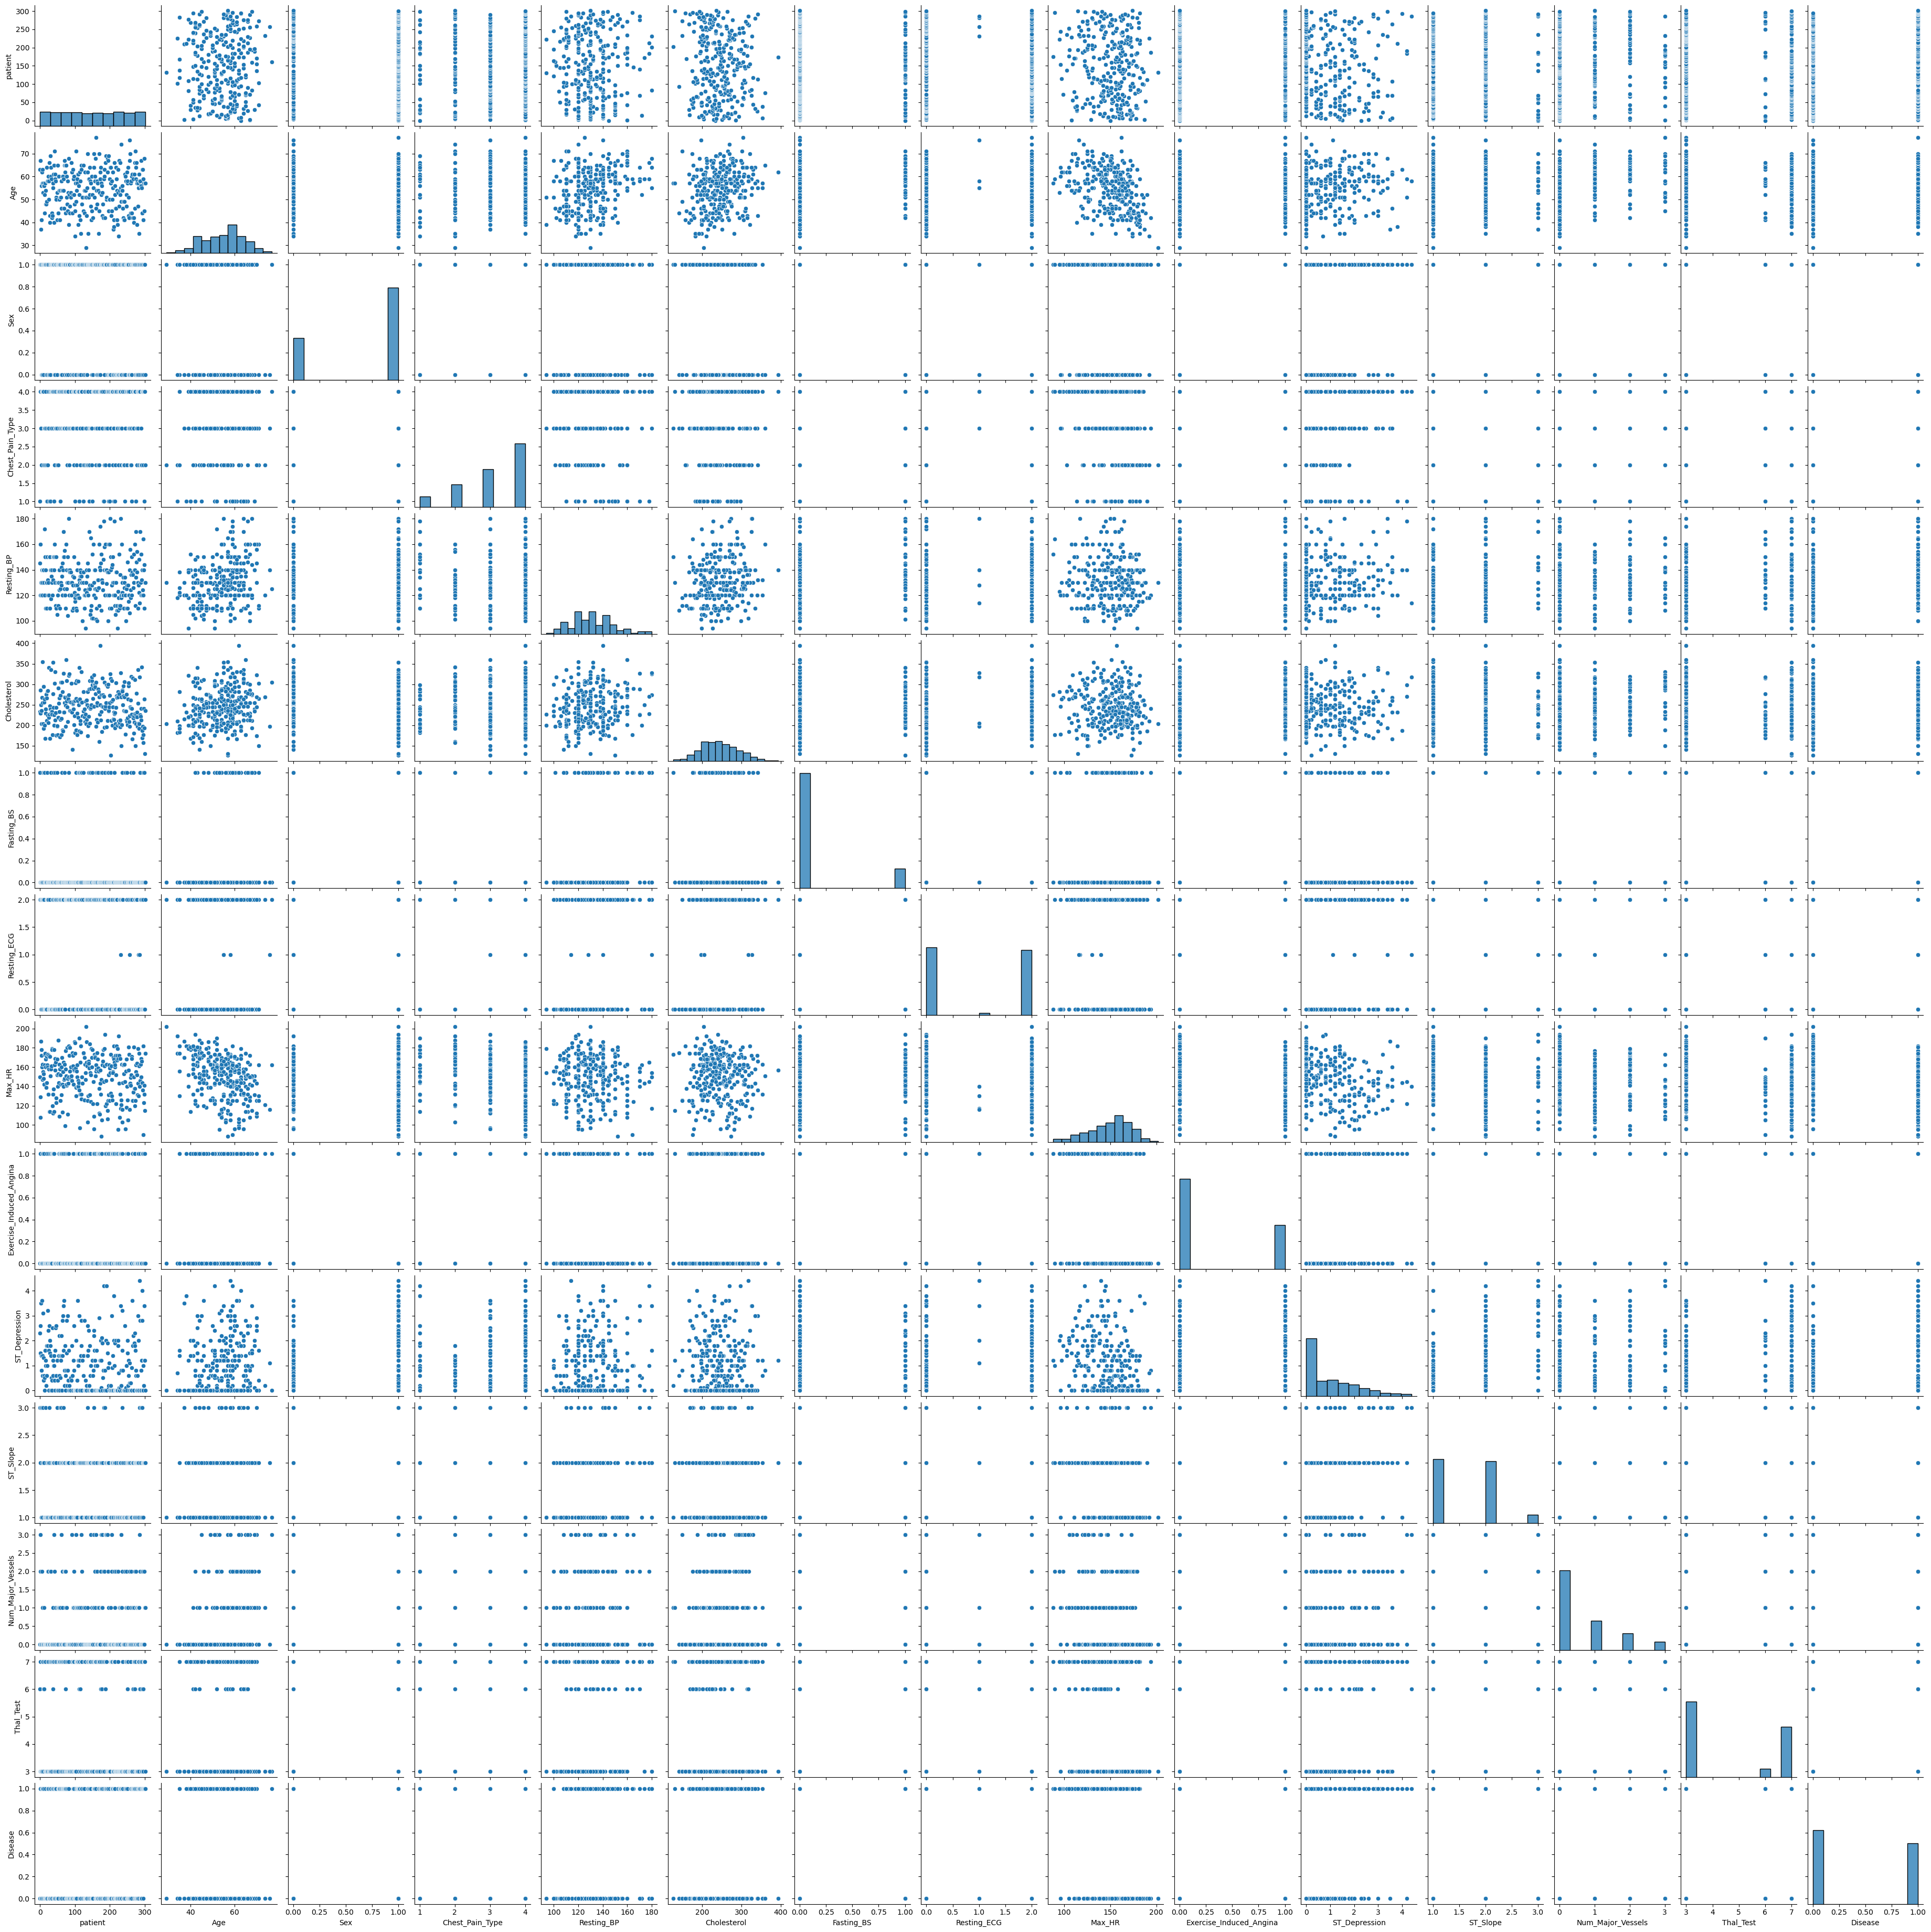

In [27]:
sns.pairplot(df)

Correlation between various features


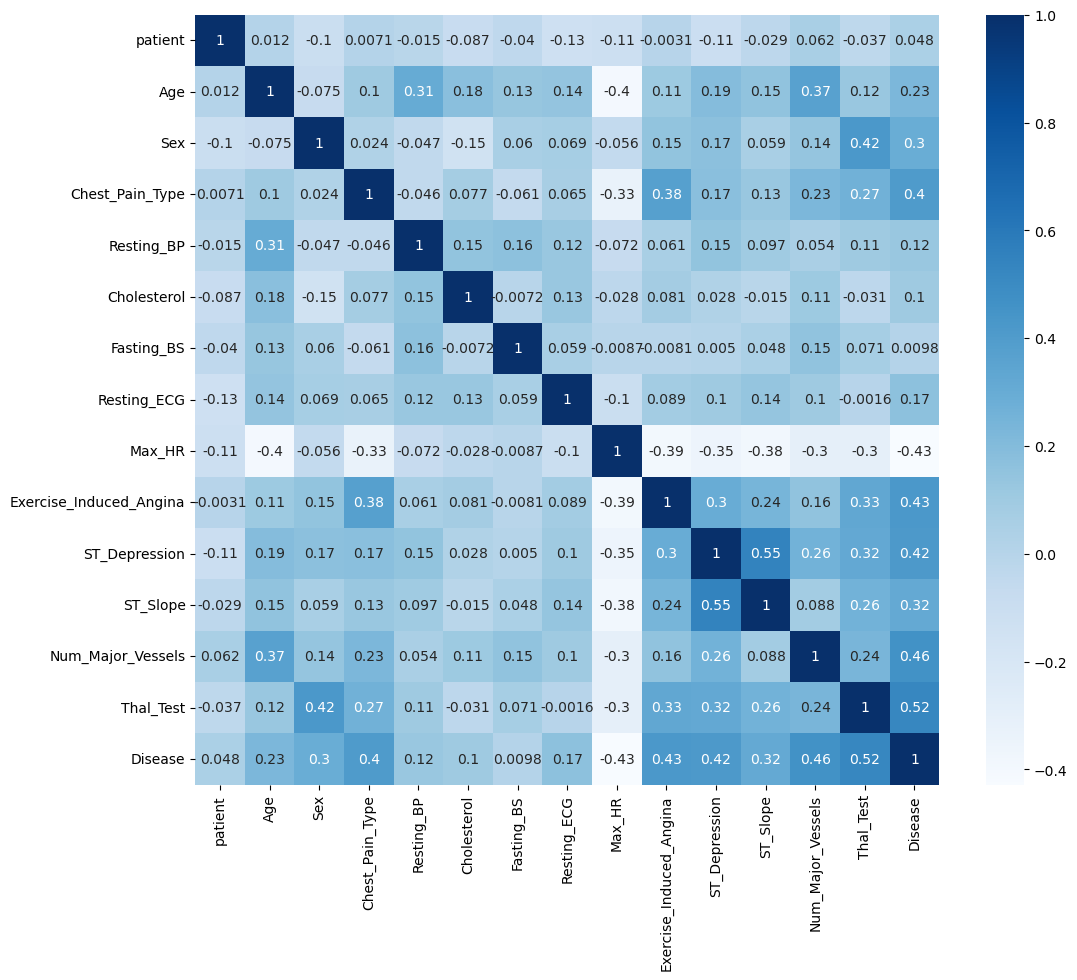

In [28]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

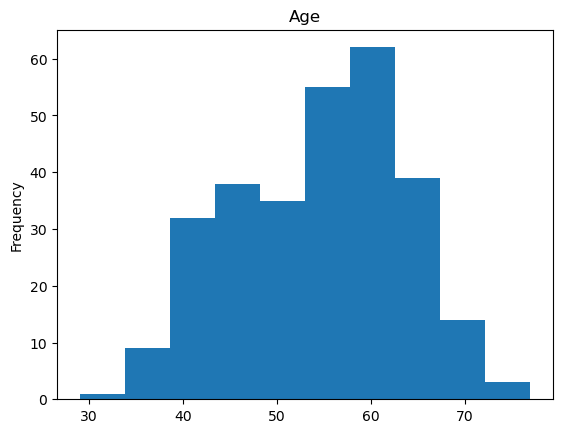

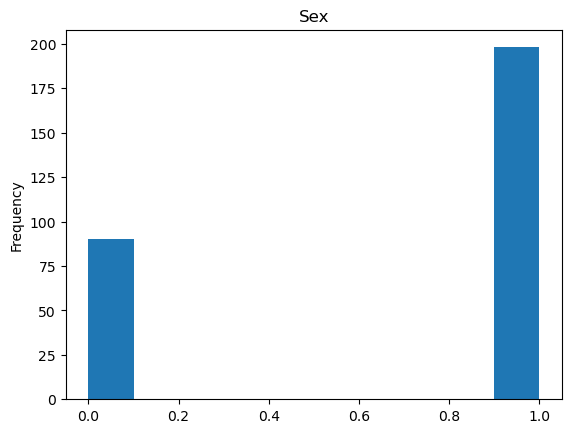

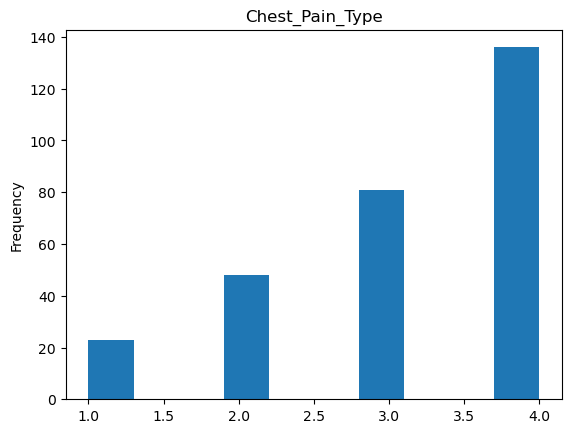

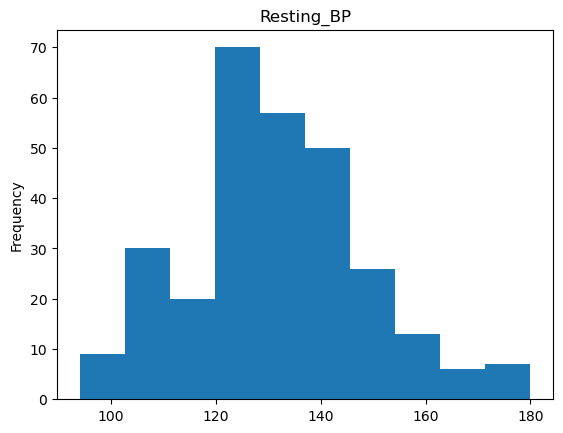

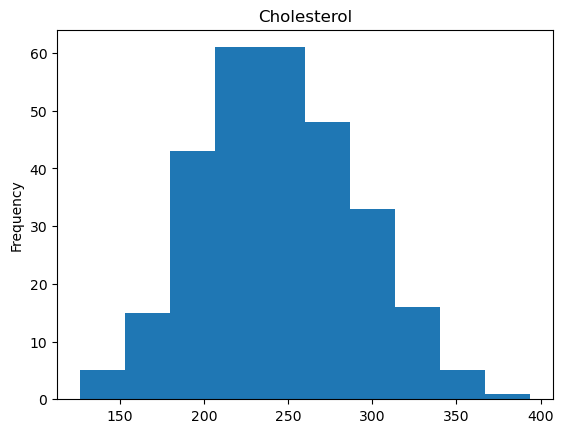

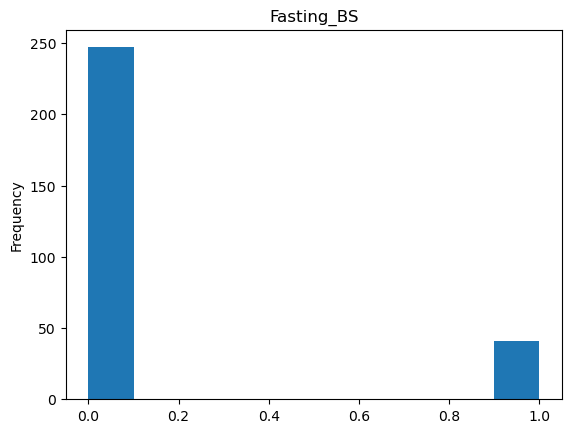

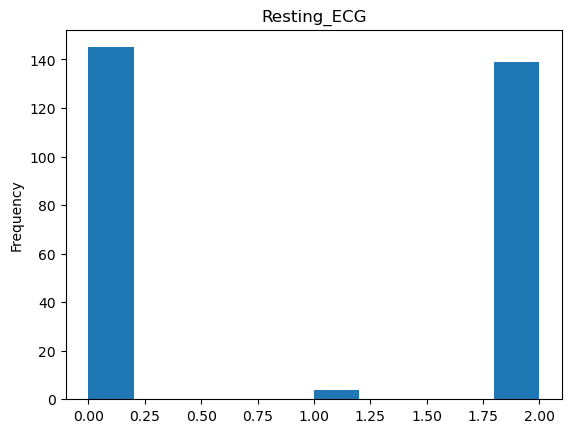

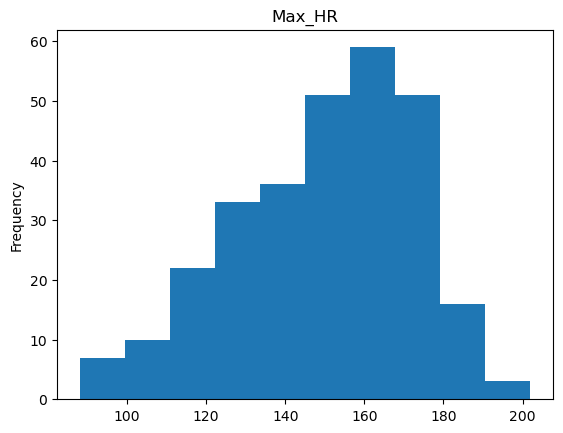

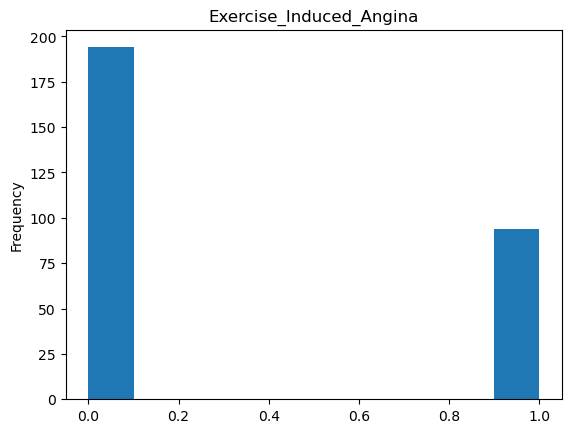

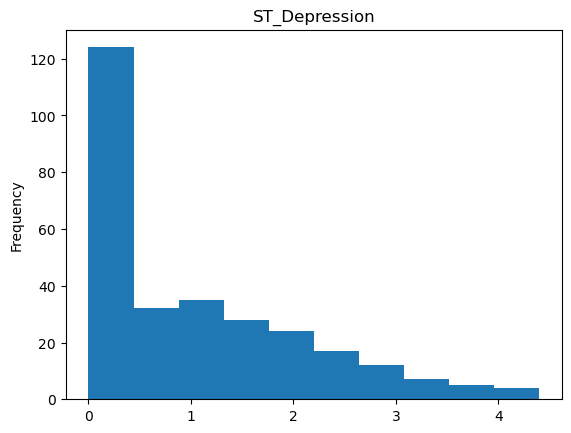

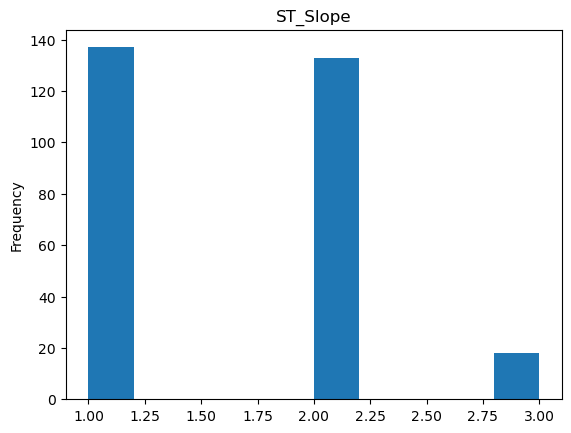

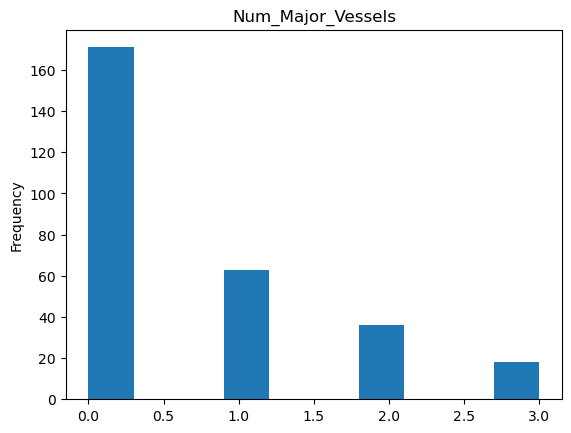

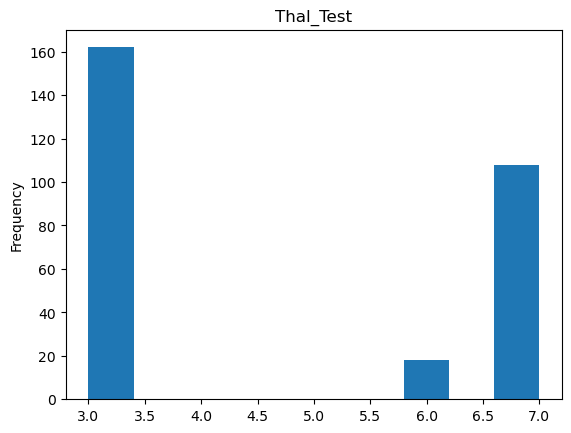

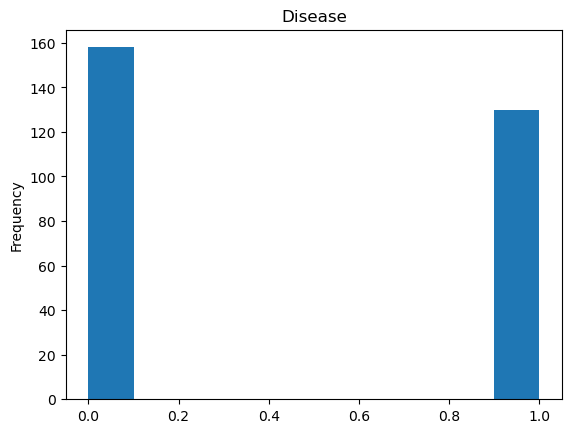

In [29]:
for col in list(df.loc[:, df.columns != 'patient']):
    df[col].plot(kind = 'hist', title = col)
    plt.show()

In [30]:
x = df['Age']
print('first 6 lines of age data:\n', x.head(6))
print('\nsummary statistics of age:\n', x.describe())

first 6 lines of age data:
 0    63
1    67
2    67
3    37
4    41
5    56
Name: Age, dtype: int64

summary statistics of age:
 count    288.000000
mean      54.354167
std        9.083407
min       29.000000
25%       47.000000
50%       55.500000
75%       61.000000
max       77.000000
Name: Age, dtype: float64


In [31]:
y = df['Resting_BP']
print('first six lines of blood pressure data (mmHg):\n', y.head(6))
print('\nsummary statistics of blood pressure:\n', y.describe())


first six lines of blood pressure data (mmHg):
 0    145
1    160
2    120
3    130
4    130
5    120
Name: Resting_BP, dtype: int64

summary statistics of blood pressure:
 count    288.000000
mean     131.118056
std       17.036545
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: Resting_BP, dtype: float64


[Text(0.5, 1.0, 'Heart Disease Prevalence by Gender')]

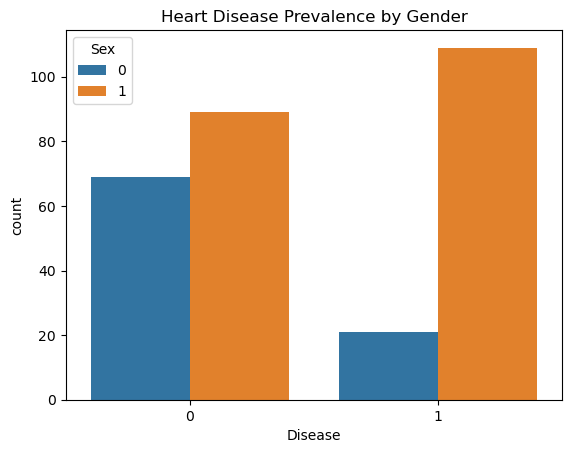

In [34]:
sns.countplot(x='Disease',data=df,hue='Sex').set(title='Heart Disease Prevalence by Gender')


In [14]:
categorical_features = ['Sex',
                        'Chest_Pain_Type',
                        'Resting_ECG',
                        'ST_Slope',
                        'Thal_Test']
df = pd.get_dummies(df, columns = categorical_features)
print('The data have ', df.shape[0], ' rows and ', df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

The data have  288  rows and  25  columns

column names: 

patient
Age
Resting_BP
Cholesterol
Fasting_BS
Max_HR
Exercise_Induced_Angina
ST_Depression
Num_Major_Vessels
Disease
Sex_0
Sex_1
Chest_Pain_Type_1
Chest_Pain_Type_2
Chest_Pain_Type_3
Chest_Pain_Type_4
Resting_ECG_0
Resting_ECG_1
Resting_ECG_2
ST_Slope_1
ST_Slope_2
ST_Slope_3
Thal_Test_3.0
Thal_Test_6.0
Thal_Test_7.0


In [15]:
class_counts = df['Disease'].value_counts()
class_counts

0    158
1    130
Name: Disease, dtype: int64

In [16]:
class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    54.861111
1    45.138889
dtype: float64

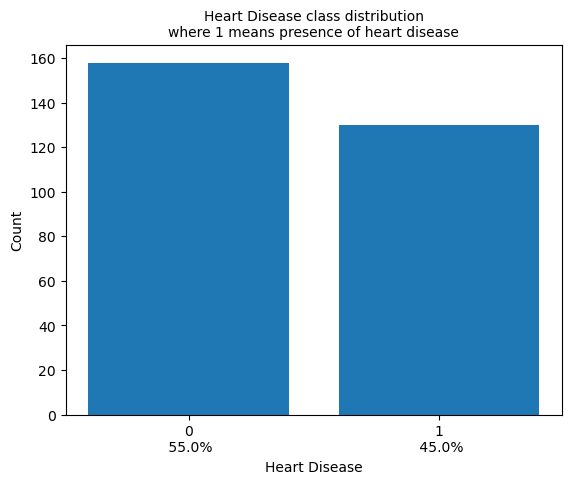

In [18]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease')
ax.set_title('Heart Disease class distribution\nwhere 1 means presence of heart disease',
              fontsize = 10)
plt.show()

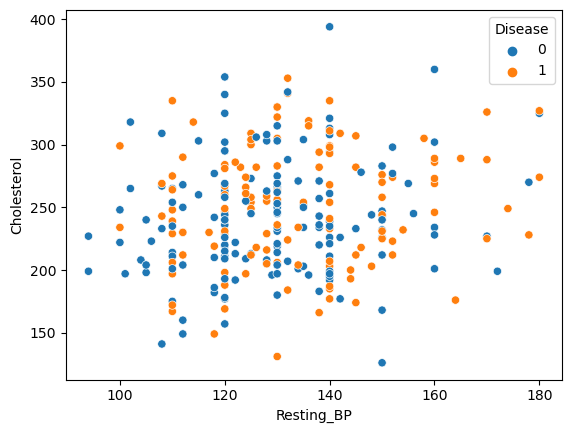

In [19]:
sns.scatterplot(x='Resting_BP', y='Cholesterol', data=df, hue='Disease')
plt.show()